In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from scipy.stats import norm
from scipy import stats

In [45]:
df_train = pd.read_csv("CleanData.csv")

In [46]:
df_train.Response.unique()

array([8, 4, 1, 6, 2, 7, 3, 5], dtype=int64)

In [47]:
#descriptive statistics summary
df_train['Response'].describe()

count    59381.000000
mean         5.636837
std          2.456833
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

In [48]:
df_train.head()

,Unnamed: 0,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0,2,1,D3,10,0.076923,2,1,1,0.641791,...,0,0,0,0,0,0,0,0,0,8
1,1,5,1,A1,26,0.076923,2,3,1,0.059701,...,0,0,0,0,0,0,0,0,0,4
2,2,6,1,E1,26,0.076923,2,3,1,0.029851,...,0,0,0,0,0,0,0,0,0,8
3,3,7,1,D4,10,0.487179,2,3,1,0.164179,...,0,0,0,0,0,0,0,0,0,8
4,4,8,1,D2,26,0.230769,2,3,1,0.417910,...,0,0,0,0,0,0,0,0,0,8


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


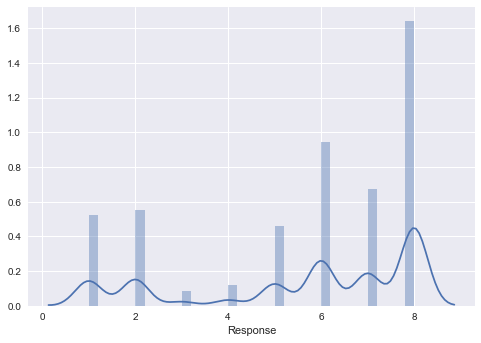

In [49]:
#histogram
sns.distplot(df_train['Response'])
plt.show()

In [50]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Response'].skew())
print("Kurtosis: %f" % df_train['Response'].kurt())

Skewness: -0.774669
Kurtosis: -0.822227


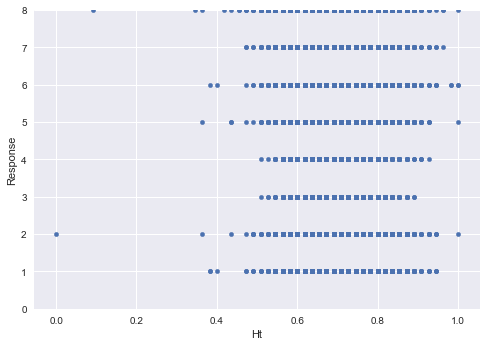

In [51]:
#scatter plot response
var = 'Ht'
data = pd.concat([df_train['Response'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Response', ylim=(0,8));
plt.show()

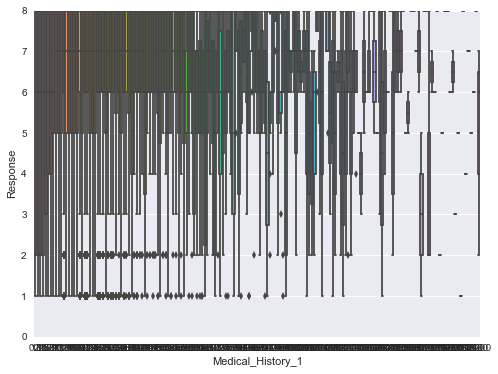

In [52]:
#box plot 
var = 'Medical_History_1'
data = pd.concat([df_train['Response'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Response", data=data)
fig.axis(ymin=0, ymax=8);
plt.show()

In [55]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Response,0,0.0
Medical_History_14,0,0.0
Family_Hist_1,0,0.0
Medical_History_2,0,0.0
Medical_History_3,0,0.0
Medical_History_4,0,0.0
Medical_History_5,0,0.0
Medical_History_6,0,0.0
Medical_History_7,0,0.0
Medical_History_8,0,0.0


In [54]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


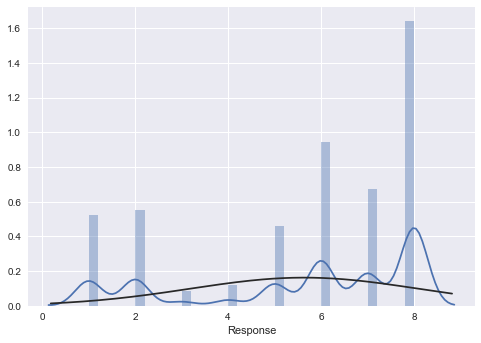

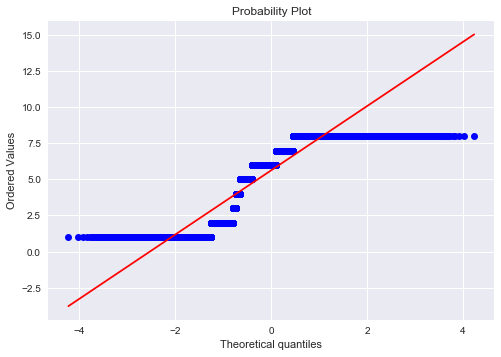

In [61]:
#histogram and normal probability plot
sns.distplot(df_train['Response'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Response'], plot=plt)
plt.show()

In [64]:
df_train.columns

Index(['Unnamed: 0', 'Id', 'Product_Info_1', 'Product_Info_2',
       'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=116)

In [72]:
cols = df_train.columns
#stats.chisquare(df_train[:,])

Index(['Unnamed: 0', 'Id', 'Product_Info_1', 'Product_Info_2',
       'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=116)